STD Series: From 0.1 to 6.283185307179586
Generated 1000 samples for mean 0.62 and std 0.1, min: 0.31999999999999995, max: 0.92
Generated 1000 input values for mean 0.62 and std 0.1
Generated 1000 cartesian products for mean 0.62 and std 0.1
Generated 1000 samples for mean 0.62 and std 0.16245641724423826, min: 0.13263074826728521, max: 1.1073692517327147
Generated 1000 input values for mean 0.62 and std 0.16245641724423826
Generated 1000 cartesian products for mean 0.62 and std 0.16245641724423826
Generated 1000 samples for mean 0.62 and std 0.2249128344884765, min: -0.05473850346542941, max: 1.2947385034654295
Generated 1000 input values for mean 0.62 and std 0.2249128344884765
Generated 1000 cartesian products for mean 0.62 and std 0.2249128344884765
Generated 1000 samples for mean 0.62 and std 0.28736925173271477, min: -0.24210775519814431, max: 1.4821077551981443
Generated 1000 input values for mean 0.62 and std 0.28736925173271477
Generated 1000 cartesian products for mean 0.62 a

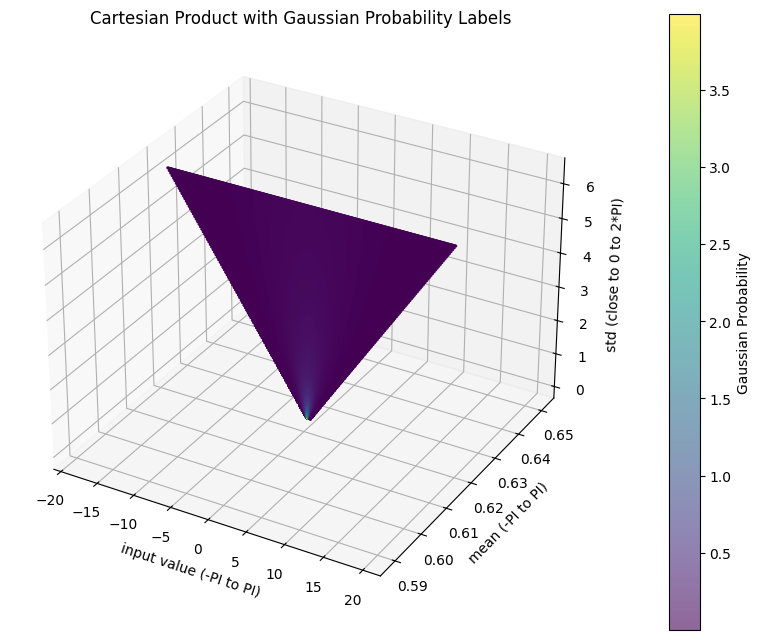

In [22]:
# Install necessary dependencies
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 1000

std = np.linspace(0.1, 2*np.pi, 100)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(0.62, 0.543, 1)

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = []
    # Maybe there is a better way than normal random samples to insure some low values are present, but this is a simple way
    samples = np.linspace(m - 3 * s, m + 3 * s, num_values)
    print(f"Generated {len(samples)} samples for mean {m} and std {s}, min: {samples.min()}, max: {samples.max()}")
    inputval.extend(samples)
    print(f"Generated {len(inputval)} input values for mean {m} and std {s}")
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    print(f"Generated {len(cartesian_product_input)} cartesian products for mean {m} and std {s}")
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()



(array([4.6834e+04, 2.1236e+04, 1.0924e+04, 5.4720e+03, 3.2900e+03,
        2.2040e+03, 1.5500e+03, 1.1660e+03, 9.1200e+02, 7.2400e+02,
        6.1600e+02, 4.8000e+02, 4.1400e+02, 3.7000e+02, 2.9400e+02,
        2.5600e+02, 2.5800e+02, 1.8400e+02, 2.1800e+02, 1.3600e+02,
        1.8000e+02, 1.2600e+02, 1.0600e+02, 1.3200e+02, 1.1800e+02,
        7.4000e+01, 8.0000e+01, 8.8000e+01, 1.1800e+02, 4.6000e+01,
        5.2000e+01, 5.4000e+01, 5.6000e+01, 6.4000e+01, 1.0200e+02,
        3.0000e+01, 2.8000e+01, 3.2000e+01, 3.2000e+01, 3.2000e+01,
        3.4000e+01, 3.6000e+01, 4.2000e+01, 5.4000e+01, 6.2000e+01,
        1.6000e+01, 1.4000e+01, 1.6000e+01, 1.6000e+01, 1.6000e+01,
        1.6000e+01, 1.6000e+01, 1.6000e+01, 1.8000e+01, 1.8000e+01,
        2.0000e+01, 1.8000e+01, 2.2000e+01, 2.4000e+01, 2.6000e+01,
        3.6000e+01, 5.0000e+01, 6.0000e+00, 6.0000e+00, 4.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00, 4.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 6.00

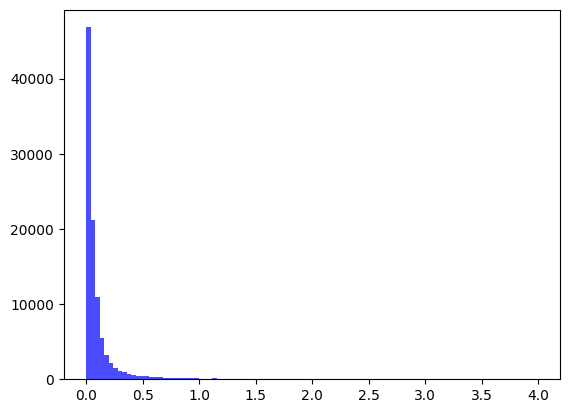

In [23]:
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [13]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)


In [15]:
print("Train Data:")
print(train_df.info())

print("\nTest Data:")
print(test_df.info())


Train Data:
<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 75220 to 15795
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Series1  80000 non-null  float64
 1   Series2  80000 non-null  float64
 2   Series3  80000 non-null  float64
 3   Label    80000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 75721 to 42410
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Series1  20000 non-null  float64
 1   Series2  20000 non-null  float64
 2   Series3  20000 non-null  float64
 3   Label    20000 non-null  float64
dtypes: float64(4)
memory usage: 781.2 KB
None


In [16]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class DataFrameDataset(Dataset):
    def __init__(self, dataframe):
        self.inputval = dataframe["Series1"]
        self.mean = dataframe["Series2"]
        self.std = dataframe["Series3"]
        self.labels = dataframe["Label"]

    def __len__(self):
        return len(self.inputval)

    def __getitem__(self, idx):
        inputval = self.inputval.iloc[idx]
        mean = self.mean.iloc[idx]
        std = self.std.iloc[idx]
        labels = self.labels.iloc[idx]
        return inputval, mean, std, labels
    
# Create the datasets
train_dataset = DataFrameDataset(train_df)
test_dataset = DataFrameDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)


In [17]:
import torch.nn as nn
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
import torch

TRAINING_PREFIX = "Largerer_dropout_new_data"

ann = nn.Sequential(
    nn.Linear(2, 128),  # Input layer: 3 features (mu, sigma, x)
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 256),  # first hidden layer
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(256, 128),  # second hidden layer
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(128, 1)    # Output layer: single value for f(x; mu, sigma)
)

#ann.load_state_dict(torch.load("largerer_ann_new_data4.pth"))

ann.to(device)

total_params = sum(p.numel() for p in ann.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params}")


Total Parameters: 66433


In [19]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objects as go
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from torcheval.metrics import R2Score


def create_loss_plot():
    fig = go.FigureWidget()
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', name='Train Loss', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[], y=[], mode='lines', name='Eval Loss', line=dict(color='orange')))

    # Configure layout
    fig.update_layout(title='Training and Evaluation Losses',
                    xaxis_title='Epoch',
                    yaxis_title='Loss',
                    template='plotly_dark')

    # Display the figure widget
    display(fig)
    return fig

def update_loss_plot(fig, train_loss, eval_loss):
    with fig.batch_update():
        fig.data[0].x = list(range(len(train_loss)))
        fig.data[0].y = train_loss
        fig.data[1].x = list(range(len(eval_loss)))
        fig.data[1].y = eval_loss

import numpy as np
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

from tqdm.auto import tqdm
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

def do_epoch(loader, model, optimizer, device, n_epochs: int, current_epoch: int, train: bool = False,):
    if train:
        model.train()
    else:
        model.eval()
    epoch_loss = 0
    metric = R2Score(device=device)
    for inputvals, means, stds, labels in tqdm(loader, desc=f"{'Epoch' if train else 'Eval Epoch'} {current_epoch+1}/{n_epochs}"):
        inputs = torch.stack([inputvals, stds], dim=1).float()
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        metric.update(outputs.squeeze(), labels)
        if train:
            optimizer.zero_grad()
            loss = F.mse_loss(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()
        else:
            loss = F.mse_loss(outputs.squeeze(), labels.float())
        epoch_loss += loss.item()
    return epoch_loss, metric.compute()

In [20]:
ann.train()

N_EPOCHS = 100
LR = 1e-4

# Create subfolder for this loop
import os
import shutil

if os.path.exists(f"./results/{TRAINING_PREFIX}"):
    shutil.rmtree(f"./results/{TRAINING_PREFIX}")
os.makedirs(f"./results/{TRAINING_PREFIX}")

optim = torch.optim.Adam(ann.parameters(), lr=LR)

last_loss = 0
last_eval_loss = 0

epoch_loss_list = []
eval_loss_list = [] 

fig = create_loss_plot()

for epoch in range(N_EPOCHS):
    epoch_loss, train_R2_score = do_epoch(train_loader, ann, optim, device, n_epochs=N_EPOCHS, current_epoch=epoch, train=True)
    eval_epoch_loss, eval_R2_score = do_epoch(test_loader, ann, None, device, n_epochs=N_EPOCHS, current_epoch=epoch, train=False)
    eval_loss_list.append(eval_epoch_loss/len(test_loader))
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss/len(train_loader)}, Diff: {epoch_loss/len(train_loader) - last_loss}, Eval Loss: {eval_epoch_loss/len(test_loader)}, Diff Eval: {eval_epoch_loss/len(test_loader) - last_eval_loss}, Train R2 Score: {train_R2_score}, Eval R2 Score: {eval_R2_score}")
    last_loss = epoch_loss/len(train_loader)
    last_eval_loss = eval_epoch_loss/len(test_loader)
    epoch_loss_list.append(epoch_loss/len(train_loader))
    update_loss_plot(fig, epoch_loss_list, eval_loss_list)

FigureWidget({
    'data': [{'line': {'color': 'blue'},
              'mode': 'lines',
              'name': 'Train Loss',
              'type': 'scatter',
              'uid': 'a95714f1-edff-4cf1-ac5b-6ce635a029d3',
              'x': [],
              'y': []},
             {'line': {'color': 'orange'},
              'mode': 'lines',
              'name': 'Eval Loss',
              'type': 'scatter',
              'uid': 'efa287a1-ce9e-4aad-a754-cc744953d19e',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Training and Evaluation Losses'},
               'xaxis': {'title': {'text': 'Epoch'}},
               'yaxis': {'title': {'text': 'Loss'}}}
})

Epoch 1/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 1/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 1, Train Loss: 340.0421945666027, Diff: 340.0421945666027, Eval Loss: 266.366105824312, Diff Eval: 266.366105824312, Train R2 Score: 0.2583455443382263, Eval R2 Score: 0.46644091606140137


Epoch 2/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 2/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 2, Train Loss: 215.9570716919507, Diff: -124.085122874652, Eval Loss: 210.5265677981725, Diff Eval: -55.83953802613951, Train R2 Score: 0.5289843082427979, Eval R2 Score: 0.5782928466796875


Epoch 3/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 3/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 3, Train Loss: 195.36409445387937, Diff: -20.592977238071313, Eval Loss: 207.38403370411177, Diff Eval: -3.1425340940607214, Train R2 Score: 0.5738983154296875, Eval R2 Score: 0.5845879316329956


Epoch 4/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 4/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 4, Train Loss: 195.50915872839144, Diff: 0.14506427451206605, Eval Loss: 207.10302726185992, Diff Eval: -0.2810064422518508, Train R2 Score: 0.5735833644866943, Eval R2 Score: 0.5851513147354126


Epoch 5/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 5/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 5, Train Loss: 193.68207056611757, Diff: -1.827088162273867, Eval Loss: 206.0191027537196, Diff Eval: -1.0839245081403135, Train R2 Score: 0.5775680541992188, Eval R2 Score: 0.5873225331306458


Epoch 6/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 6/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 6, Train Loss: 192.1768494286435, Diff: -1.5052211374740807, Eval Loss: 208.07483366478505, Diff Eval: 2.0557309110654387, Train R2 Score: 0.5808504819869995, Eval R2 Score: 0.5832048654556274


Epoch 7/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 7/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 7, Train Loss: 196.1334804016512, Diff: 3.9566309730077194, Eval Loss: 207.75661533412338, Diff Eval: -0.31821833066166505, Train R2 Score: 0.5722217559814453, Eval R2 Score: 0.5838423371315002


Epoch 8/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 8/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 8, Train Loss: 195.0974404327115, Diff: -1.0360399689397184, Eval Loss: 206.0583194884576, Diff Eval: -1.6982958456657684, Train R2 Score: 0.5744816064834595, Eval R2 Score: 0.5872439742088318


Epoch 9/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 9/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 9, Train Loss: 192.6526297731448, Diff: -2.4448106595666843, Eval Loss: 207.30649509766744, Diff Eval: 1.2481756092098237, Train R2 Score: 0.5798145532608032, Eval R2 Score: 0.5847436785697937


Epoch 10/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 10/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 10, Train Loss: 195.54608439344594, Diff: 2.893454620301128, Eval Loss: 205.85713130546517, Diff Eval: -1.4493637922022629, Train R2 Score: 0.5735030174255371, Eval R2 Score: 0.5876466035842896


Epoch 11/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 11/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 11, Train Loss: 195.27459496248505, Diff: -0.27148943096088374, Eval Loss: 205.927390987585, Diff Eval: 0.07025968211982558, Train R2 Score: 0.5740959644317627, Eval R2 Score: 0.5875062346458435


Epoch 12/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 12/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 12, Train Loss: 192.70387144167105, Diff: -2.570723520813999, Eval Loss: 205.96162188536061, Diff Eval: 0.03423089777561472, Train R2 Score: 0.5797032117843628, Eval R2 Score: 0.5874372720718384


Epoch 13/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 13/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 13, Train Loss: 194.81613160370082, Diff: 2.11226016202977, Eval Loss: 210.34568020067792, Diff Eval: 4.384058315317304, Train R2 Score: 0.5750961303710938, Eval R2 Score: 0.578655481338501


Epoch 14/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 14/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 14, Train Loss: 191.07084449647647, Diff: -3.7452871072243568, Eval Loss: 207.27550078561035, Diff Eval: -3.070179415067571, Train R2 Score: 0.5832650065422058, Eval R2 Score: 0.5848056077957153


Epoch 15/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 15/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 15, Train Loss: 191.34015074561103, Diff: 0.2693062491345586, Eval Loss: 208.16056898549763, Diff Eval: 0.8850681998872858, Train R2 Score: 0.5826771259307861, Eval R2 Score: 0.58303302526474


Epoch 16/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 16/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 16, Train Loss: 196.22607589955823, Diff: 4.885925153947198, Eval Loss: 206.56962811526134, Diff Eval: -1.5909408702362953, Train R2 Score: 0.5720213651657104, Eval R2 Score: 0.5862195491790771


Epoch 17/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 17/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 17, Train Loss: 194.8466941493543, Diff: -1.379381750203919, Eval Loss: 210.4847843090934, Diff Eval: 3.9151561938320754, Train R2 Score: 0.5750285387039185, Eval R2 Score: 0.5783771276473999


Epoch 18/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 18/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 18, Train Loss: 194.76704461759496, Diff: -0.07964953175934397, Eval Loss: 207.51995578874246, Diff Eval: -2.964828520350949, Train R2 Score: 0.575202465057373, Eval R2 Score: 0.5843157768249512


Epoch 19/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 19/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 19, Train Loss: 194.2940283782512, Diff: -0.4730162393437638, Eval Loss: 206.33642131005973, Diff Eval: -1.1835344786827307, Train R2 Score: 0.5762355923652649, Eval R2 Score: 0.5866868495941162


Epoch 20/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 20/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 20, Train Loss: 194.31898857455263, Diff: 0.024960196301435644, Eval Loss: 205.89583932884355, Diff Eval: -0.44058198121618375, Train R2 Score: 0.576181173324585, Eval R2 Score: 0.5875692367553711


Epoch 21/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 21/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 21, Train Loss: 196.34323454797592, Diff: 2.024245973423291, Eval Loss: 214.12677273112502, Diff Eval: 8.230933402281465, Train R2 Score: 0.5717650651931763, Eval R2 Score: 0.5710822343826294


Epoch 22/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 22/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 22, Train Loss: 194.3841962846883, Diff: -1.9590382632876242, Eval Loss: 206.4339969618704, Diff Eval: -7.6927757692546095, Train R2 Score: 0.57603919506073, Eval R2 Score: 0.5864906311035156


Epoch 23/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 23/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 23, Train Loss: 195.12690253774318, Diff: 0.7427062530548767, Eval Loss: 206.9838663844863, Diff Eval: 0.5498694226158989, Train R2 Score: 0.5744185447692871, Eval R2 Score: 0.5853895545005798


Epoch 24/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 24/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 24, Train Loss: 194.5427851862913, Diff: -0.58411735145188, Eval Loss: 206.72060086757693, Diff Eval: -0.26326551690937094, Train R2 Score: 0.5756920576095581, Eval R2 Score: 0.5859168767929077


Epoch 25/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 25/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 25, Train Loss: 194.13650784939475, Diff: -0.4062773368965509, Eval Loss: 206.68591645808365, Diff Eval: -0.034684409493280555, Train R2 Score: 0.5765790939331055, Eval R2 Score: 0.5859864950180054


Epoch 26/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 26/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 26, Train Loss: 196.24513655022426, Diff: 2.108628700829513, Eval Loss: 205.3589816201915, Diff Eval: -1.3269348378921393, Train R2 Score: 0.5719798803329468, Eval R2 Score: 0.5886440277099609


Epoch 27/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 27/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 27, Train Loss: 194.38923239341815, Diff: -1.8559041568061048, Eval Loss: 211.11637841274688, Diff Eval: 5.757396792555369, Train R2 Score: 0.5760276317596436, Eval R2 Score: 0.5771121978759766


Epoch 28/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 28/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 28, Train Loss: 196.41188037076023, Diff: 2.022647977342075, Eval Loss: 207.56704554795584, Diff Eval: -3.5493328647910403, Train R2 Score: 0.5716152191162109, Eval R2 Score: 0.5842217206954956


Epoch 29/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 29/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 29, Train Loss: 193.80390695735807, Diff: -2.6079734134021635, Eval Loss: 206.5853943267071, Diff Eval: -0.9816512212487396, Train R2 Score: 0.5773032903671265, Eval R2 Score: 0.5861877202987671


Epoch 30/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 30/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 30, Train Loss: 192.9708311241776, Diff: -0.8330758331804589, Eval Loss: 205.91031113537463, Diff Eval: -0.675083191332476, Train R2 Score: 0.5791219472885132, Eval R2 Score: 0.5875409245491028


Epoch 31/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 31/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 31, Train Loss: 193.95836438318446, Diff: 0.9875332590068524, Eval Loss: 207.20909553309804, Diff Eval: 1.2987843977234093, Train R2 Score: 0.5769681930541992, Eval R2 Score: 0.5849391222000122


Epoch 32/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 32/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 32, Train Loss: 194.9308302453749, Diff: 0.9724658621904325, Eval Loss: 205.84008278618464, Diff Eval: -1.3690127469133984, Train R2 Score: 0.574846625328064, Eval R2 Score: 0.5876806974411011


Epoch 33/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 33/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 33, Train Loss: 192.88537478198438, Diff: -2.0454554633905104, Eval Loss: 206.03171031646522, Diff Eval: 0.19162753028058432, Train R2 Score: 0.5793077945709229, Eval R2 Score: 0.5872974991798401


Epoch 34/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 34/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 34, Train Loss: 195.48207284942197, Diff: 2.596698067437586, Eval Loss: 205.75349190955282, Diff Eval: -0.2782184069124014, Train R2 Score: 0.5736443996429443, Eval R2 Score: 0.5878548622131348


Epoch 35/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 35/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 35, Train Loss: 195.90420722675134, Diff: 0.4221343773293711, Eval Loss: 206.1918686090657, Diff Eval: 0.4383766995128724, Train R2 Score: 0.5727240443229675, Eval R2 Score: 0.5869763493537903


Epoch 36/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 36/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 36, Train Loss: 193.2137101287685, Diff: -2.690497097982842, Eval Loss: 206.72867831252105, Diff Eval: 0.5368097034553614, Train R2 Score: 0.5785912871360779, Eval R2 Score: 0.5859014391899109


Epoch 37/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 37/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 37, Train Loss: 193.73601321898082, Diff: 0.5223030902123185, Eval Loss: 210.36270625868897, Diff Eval: 3.634027946167919, Train R2 Score: 0.5774521827697754, Eval R2 Score: 0.5786212682723999


Epoch 38/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 38/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 38, Train Loss: 194.29491034259775, Diff: 0.55889712361693, Eval Loss: 205.66510078964404, Diff Eval: -4.69760546904493, Train R2 Score: 0.5762327909469604, Eval R2 Score: 0.5880324244499207


Epoch 39/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 39/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 39, Train Loss: 192.83464674435726, Diff: -1.4602635982404877, Eval Loss: 206.89007877171568, Diff Eval: 1.2249779820716356, Train R2 Score: 0.5794187188148499, Eval R2 Score: 0.5855777263641357


Epoch 40/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 40/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 40, Train Loss: 193.20453977856482, Diff: 0.36989303420756414, Eval Loss: 205.79060987738518, Diff Eval: -1.0994688943304993, Train R2 Score: 0.5786111950874329, Eval R2 Score: 0.5877804756164551


Epoch 41/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 41/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 41, Train Loss: 196.00470938625887, Diff: 2.8001696076940448, Eval Loss: 205.72936142246903, Diff Eval: -0.061248454916153605, Train R2 Score: 0.5725039839744568, Eval R2 Score: 0.587903618812561


Epoch 42/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 42/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 42, Train Loss: 193.99162000819908, Diff: -2.0130893780597887, Eval Loss: 206.2383291559551, Diff Eval: 0.508967733486088, Train R2 Score: 0.5768945217132568, Eval R2 Score: 0.5868839025497437


Epoch 43/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 43/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 43, Train Loss: 194.15527798774139, Diff: 0.16365797954230743, Eval Loss: 209.62918859165336, Diff Eval: 3.390859435698246, Train R2 Score: 0.5765379667282104, Eval R2 Score: 0.580091118812561


Epoch 44/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 44/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 44, Train Loss: 191.9061757077746, Diff: -2.2491022799667917, Eval Loss: 209.25027369565336, Diff Eval: -0.3789148959999977, Train R2 Score: 0.5814424753189087, Eval R2 Score: 0.5808501839637756


Epoch 45/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 45/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 45, Train Loss: 192.7115175354509, Diff: 0.8053418276763011, Eval Loss: 207.77591610079844, Diff Eval: -1.4743575948549221, Train R2 Score: 0.579686164855957, Eval R2 Score: 0.5838035345077515


Epoch 46/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 46/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 46, Train Loss: 194.09265707583427, Diff: 1.3811395403833728, Eval Loss: 205.63390234834813, Diff Eval: -2.1420137524503104, Train R2 Score: 0.5766738653182983, Eval R2 Score: 0.5880943536758423


Epoch 47/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 47/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 47, Train Loss: 194.17139669993887, Diff: 0.07873962410459967, Eval Loss: 205.96931381795122, Diff Eval: 0.33541146960308765, Train R2 Score: 0.576502799987793, Eval R2 Score: 0.5874234437942505


Epoch 48/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 48/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 48, Train Loss: 194.5810943192354, Diff: 0.40969761929653714, Eval Loss: 206.72213483218258, Diff Eval: 0.7528210142313583, Train R2 Score: 0.575608491897583, Eval R2 Score: 0.5859143137931824


Epoch 49/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 49/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 49, Train Loss: 192.9517919047119, Diff: -1.6293024145234938, Eval Loss: 206.8949027819217, Diff Eval: 0.17276794973912502, Train R2 Score: 0.5791621208190918, Eval R2 Score: 0.5855686068534851


Epoch 50/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 50/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 50, Train Loss: 194.3359753876755, Diff: 1.3841834829635786, Eval Loss: 208.30238268148452, Diff Eval: 1.4074798995628157, Train R2 Score: 0.5761431455612183, Eval R2 Score: 0.5827497243881226


Epoch 51/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 51/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 51, Train Loss: 195.26483166566658, Diff: 0.9288562779910876, Eval Loss: 205.34524303884504, Diff Eval: -2.9571396426394756, Train R2 Score: 0.5741174221038818, Eval R2 Score: 0.5886727571487427


Epoch 52/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 52/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 52, Train Loss: 191.95636840993166, Diff: -3.308463255734921, Eval Loss: 210.5937216039849, Diff Eval: 5.248478565139862, Train R2 Score: 0.5813330411911011, Eval R2 Score: 0.5781594514846802


Epoch 53/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 53/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 53, Train Loss: 193.0353911671318, Diff: 1.0790227572001356, Eval Loss: 207.53167584752714, Diff Eval: -3.0620457564577634, Train R2 Score: 0.5789802074432373, Eval R2 Score: 0.5842931866645813


Epoch 54/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 54/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 54, Train Loss: 193.49395863366573, Diff: 0.45856746653393543, Eval Loss: 222.13501846374152, Diff Eval: 14.603342616214377, Train R2 Score: 0.5779794454574585, Eval R2 Score: 0.5550413131713867


Epoch 55/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 55/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 55, Train Loss: 196.71586934764073, Diff: 3.2219107139750065, Eval Loss: 208.47608893625502, Diff Eval: -13.658929527486492, Train R2 Score: 0.570951521396637, Eval R2 Score: 0.5824010372161865


Epoch 56/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 56/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 56, Train Loss: 194.13554630493928, Diff: -2.580323042701451, Eval Loss: 206.2884937335941, Diff Eval: -2.1875952026609298, Train R2 Score: 0.5765801668167114, Eval R2 Score: 0.5867835283279419


Epoch 57/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 57/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 57, Train Loss: 192.298642443772, Diff: -1.8369038611672863, Eval Loss: 205.71989554552812, Diff Eval: -0.5685981880659767, Train R2 Score: 0.5805871486663818, Eval R2 Score: 0.5879226922988892


Epoch 58/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 58/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 58, Train Loss: 194.03788896247238, Diff: 1.7392465187003836, Eval Loss: 205.3099157483798, Diff Eval: -0.4099797971483099, Train R2 Score: 0.5767935514450073, Eval R2 Score: 0.5887436866760254


Epoch 59/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 59/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 59, Train Loss: 193.92588048619047, Diff: -0.11200847628191468, Eval Loss: 208.1312319035808, Diff Eval: 2.8213161552010035, Train R2 Score: 0.5770373940467834, Eval R2 Score: 0.583092451095581


Epoch 60/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 60/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 60, Train Loss: 195.40565768354875, Diff: 1.4797771973582883, Eval Loss: 213.3513466572066, Diff Eval: 5.220114753625779, Train R2 Score: 0.5738099813461304, Eval R2 Score: 0.5726349353790283


Epoch 61/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 61/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 61, Train Loss: 194.1334028116321, Diff: -1.2722548719166582, Eval Loss: 205.7353607241025, Diff Eval: -7.615985933104099, Train R2 Score: 0.5765856504440308, Eval R2 Score: 0.5878916382789612


Epoch 62/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 62/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 62, Train Loss: 195.31243818619606, Diff: 1.1790353745639663, Eval Loss: 206.72898442699426, Diff Eval: 0.9936237028917674, Train R2 Score: 0.5740145444869995, Eval R2 Score: 0.5859006643295288


Epoch 63/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 63/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 63, Train Loss: 193.99065650827646, Diff: -1.3217816779196028, Eval Loss: 211.98683584293644, Diff Eval: 5.257851415942184, Train R2 Score: 0.5768965482711792, Eval R2 Score: 0.5753681659698486


Epoch 64/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 64/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 64, Train Loss: 193.30083131250305, Diff: -0.689825195773409, Eval Loss: 205.68326550971685, Diff Eval: -6.3035703332195965, Train R2 Score: 0.578400731086731, Eval R2 Score: 0.5879957675933838


Epoch 65/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 65/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 65, Train Loss: 193.9878413213529, Diff: 0.6870100088498532, Eval Loss: 208.15803431766508, Diff Eval: 2.4747688079482373, Train R2 Score: 0.5769022107124329, Eval R2 Score: 0.5830384492874146


Epoch 66/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 66/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 66, Train Loss: 196.16678973950832, Diff: 2.1789484181554144, Eval Loss: 207.37549668330766, Diff Eval: -0.7825376343574248, Train R2 Score: 0.5721502304077148, Eval R2 Score: 0.5846058130264282


Epoch 67/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 67/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 67, Train Loss: 192.55647133124484, Diff: -3.610318408263481, Eval Loss: 205.16864488759708, Diff Eval: -2.206851795710577, Train R2 Score: 0.5800246596336365, Eval R2 Score: 0.5890265703201294


Epoch 68/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 68/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 68, Train Loss: 192.67566116031216, Diff: 0.11918982906732367, Eval Loss: 205.0015506392663, Diff Eval: -0.167094248330784, Train R2 Score: 0.5797652006149292, Eval R2 Score: 0.589361310005188


Epoch 69/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 69/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 69, Train Loss: 191.4059090776231, Diff: -1.2697520826890525, Eval Loss: 207.55473030002628, Diff Eval: 2.55317966075998, Train R2 Score: 0.5825330018997192, Eval R2 Score: 0.5842469930648804


Epoch 70/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 70/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 70, Train Loss: 192.81385888733462, Diff: 1.4079498097115106, Eval Loss: 208.4423521220194, Diff Eval: 0.8876218219931218, Train R2 Score: 0.579463005065918, Eval R2 Score: 0.582468569278717


Epoch 71/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 71/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 71, Train Loss: 195.0508839245988, Diff: 2.237025037264175, Eval Loss: 205.351052908016, Diff Eval: -3.0912992140034135, Train R2 Score: 0.5745848417282104, Eval R2 Score: 0.5886608362197876


Epoch 72/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 72/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 72, Train Loss: 193.65636734959745, Diff: -1.3945165750013473, Eval Loss: 207.0612380769384, Diff Eval: 1.7101851689224077, Train R2 Score: 0.5776239633560181, Eval R2 Score: 0.585235595703125


Epoch 73/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 73/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 73, Train Loss: 194.41214460767904, Diff: 0.7557772580815936, Eval Loss: 205.22209545511862, Diff Eval: -1.839142621819775, Train R2 Score: 0.5759762525558472, Eval R2 Score: 0.588919460773468


Epoch 74/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 74/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 74, Train Loss: 194.58499188413407, Diff: 0.1728472764550304, Eval Loss: 207.65501165861573, Diff Eval: 2.432916203497115, Train R2 Score: 0.5755994319915771, Eval R2 Score: 0.5840457677841187


Epoch 75/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 75/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 75, Train Loss: 193.8346816432884, Diff: -0.7503102408456641, Eval Loss: 208.4399046954033, Diff Eval: 0.7848930367875653, Train R2 Score: 0.5772359371185303, Eval R2 Score: 0.5824741125106812


Epoch 76/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 76/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 76, Train Loss: 192.01530816116767, Diff: -1.8193734821207386, Eval Loss: 214.29502819219962, Diff Eval: 5.855123496796324, Train R2 Score: 0.5812048316001892, Eval R2 Score: 0.5707458257675171


Epoch 77/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 77/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 77, Train Loss: 192.760155474979, Diff: 0.7448473138113343, Eval Loss: 212.83941264408136, Diff Eval: -1.45561554811826, Train R2 Score: 0.5795806646347046, Eval R2 Score: 0.5736615657806396


Epoch 78/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 78/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 78, Train Loss: 195.5043721221558, Diff: 2.744216647176785, Eval Loss: 213.4980355878955, Diff Eval: 0.6586229438141231, Train R2 Score: 0.5735949277877808, Eval R2 Score: 0.5723421573638916


Epoch 79/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 79/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 79, Train Loss: 193.95010393752037, Diff: -1.5542681846354185, Eval Loss: 205.91381128980277, Diff Eval: -7.584224298092721, Train R2 Score: 0.5769840478897095, Eval R2 Score: 0.5875339508056641


Epoch 80/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 80/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 80, Train Loss: 193.95962169868554, Diff: 0.009517761165170668, Eval Loss: 205.59130111462994, Diff Eval: -0.3225101751728232, Train R2 Score: 0.5769628286361694, Eval R2 Score: 0.5881795883178711


Epoch 81/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 81/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 81, Train Loss: 193.8888848865419, Diff: -0.07073681214365024, Eval Loss: 206.0050895608832, Diff Eval: 0.41378844625324973, Train R2 Score: 0.5771186351776123, Eval R2 Score: 0.5873502492904663


Epoch 82/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 82/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 82, Train Loss: 193.80045099172895, Diff: -0.08843389481293684, Eval Loss: 216.4334947933699, Diff Eval: 10.42840523248671, Train R2 Score: 0.57731032371521, Eval R2 Score: 0.5664611458778381


Epoch 83/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 83/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 83, Train Loss: 192.72596502206468, Diff: -1.0744859696642663, Eval Loss: 209.26149440361652, Diff Eval: -7.172000389753379, Train R2 Score: 0.5796542763710022, Eval R2 Score: 0.5808275938034058


Epoch 84/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 84/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 84, Train Loss: 193.69537705433765, Diff: 0.9694120322729702, Eval Loss: 210.01480448486464, Diff Eval: 0.7533100812481166, Train R2 Score: 0.5775402188301086, Eval R2 Score: 0.579318642616272


Epoch 85/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 85/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 85, Train Loss: 193.64770563692844, Diff: -0.04767141740921943, Eval Loss: 208.1526009621409, Diff Eval: -1.8622035227237461, Train R2 Score: 0.5776432752609253, Eval R2 Score: 0.5830487012863159


Epoch 86/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 86/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 86, Train Loss: 194.11126097252193, Diff: 0.4635553355934974, Eval Loss: 207.52751022183799, Diff Eval: -0.6250907403029089, Train R2 Score: 0.5766324996948242, Eval R2 Score: 0.5843009352684021


Epoch 87/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 87/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 87, Train Loss: 196.12480423872844, Diff: 2.0135432662065114, Eval Loss: 207.12966890413443, Diff Eval: -0.397841317703552, Train R2 Score: 0.5722407698631287, Eval R2 Score: 0.5850977897644043


Epoch 88/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 88/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 88, Train Loss: 194.07791095764944, Diff: -2.046893281079008, Eval Loss: 215.49294627496255, Diff Eval: 8.363277370828115, Train R2 Score: 0.5767050981521606, Eval R2 Score: 0.5683454275131226


Epoch 89/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 89/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 89, Train Loss: 193.79490510696945, Diff: -0.2830058506799844, Eval Loss: 207.2248315416739, Diff Eval: -8.268114733288655, Train R2 Score: 0.5773224830627441, Eval R2 Score: 0.584906816482544


Epoch 90/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 90/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 90, Train Loss: 194.44611455983545, Diff: 0.6512094528659986, Eval Loss: 205.4582325165168, Diff Eval: -1.7665990251570918, Train R2 Score: 0.5759024024009705, Eval R2 Score: 0.5884453654289246


Epoch 91/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 91/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 91, Train Loss: 194.48477975282304, Diff: 0.038665192987593855, Eval Loss: 206.60580982570698, Diff Eval: 1.1475773091901829, Train R2 Score: 0.5758180618286133, Eval R2 Score: 0.5861470699310303


Epoch 92/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 92/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 92, Train Loss: 194.78446787364555, Diff: 0.29968812082250906, Eval Loss: 207.62849389981795, Diff Eval: 1.0226840741109697, Train R2 Score: 0.5751646161079407, Eval R2 Score: 0.5840989947319031


Epoch 93/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 93/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 93, Train Loss: 195.91650838305586, Diff: 1.1320405094103023, Eval Loss: 205.59284678374704, Diff Eval: -2.035647116070919, Train R2 Score: 0.5726953744888306, Eval R2 Score: 0.5881766080856323


Epoch 94/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 94/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 94, Train Loss: 194.00377586022256, Diff: -1.912732522833295, Eval Loss: 205.44331469004223, Diff Eval: -0.14953209370480636, Train R2 Score: 0.5768657922744751, Eval R2 Score: 0.5884759426116943


Epoch 95/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 95/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 95, Train Loss: 193.12582280831896, Diff: -0.877953051903603, Eval Loss: 212.29939320318786, Diff Eval: 6.856078513145633, Train R2 Score: 0.57878178358078, Eval R2 Score: 0.5747421979904175


Epoch 96/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 96/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 96, Train Loss: 192.18415701390617, Diff: -0.9416657944127849, Eval Loss: 210.95874263620274, Diff Eval: -1.3406505669851185, Train R2 Score: 0.5808354616165161, Eval R2 Score: 0.5774279832839966


Epoch 97/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 97/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 97, Train Loss: 193.58192264496319, Diff: 1.3977656310570126, Eval Loss: 205.87377530873707, Diff Eval: -5.084967327465677, Train R2 Score: 0.577785313129425, Eval R2 Score: 0.5876134634017944


Epoch 98/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 98/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 98, Train Loss: 192.50779084537572, Diff: -1.0741317995874624, Eval Loss: 205.58566094143387, Diff Eval: -0.2881143673031943, Train R2 Score: 0.5801294445991516, Eval R2 Score: 0.5881909132003784


Epoch 99/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 99/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 99, Train Loss: 193.5571875716774, Diff: 1.0493967263016657, Eval Loss: 211.18995025426267, Diff Eval: 5.604289312828797, Train R2 Score: 0.5778405666351318, Eval R2 Score: 0.5769644379615784


Epoch 100/100:   0%|          | 0/5000 [00:00<?, ?it/s]

Eval Epoch 100/100:   0%|          | 0/1250 [00:00<?, ?it/s]

Epoch 100, Train Loss: 192.63747764529882, Diff: -0.9197099263785731, Eval Loss: 205.69452010221215, Diff Eval: -5.495430152050517, Train R2 Score: 0.579847514629364, Eval R2 Score: 0.587972104549408


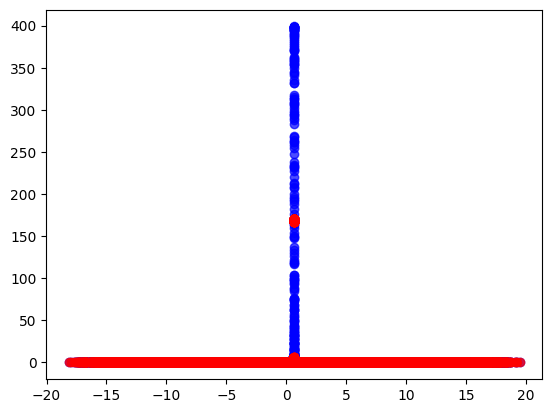

In [21]:
# Plot test data and predictions
ann.eval()

# Get test input as tensor of shape (n, 2) for one random std
test_input = torch.stack([torch.tensor(test_df["Series1"].values), torch.tensor(test_df["Series3"].values)], dim=1).float().to(device)
test_labels = torch.tensor(test_df["Label"].values).float().to(device)

test_predictions = ann(test_input).squeeze().detach().cpu().numpy()

plt.scatter(test_df["Series1"], test_df["Label"], color='blue', alpha=0.7, label='Test Data')

plt.scatter(test_df["Series1"], test_predictions, color='red', alpha=0.7, label='Predictions')

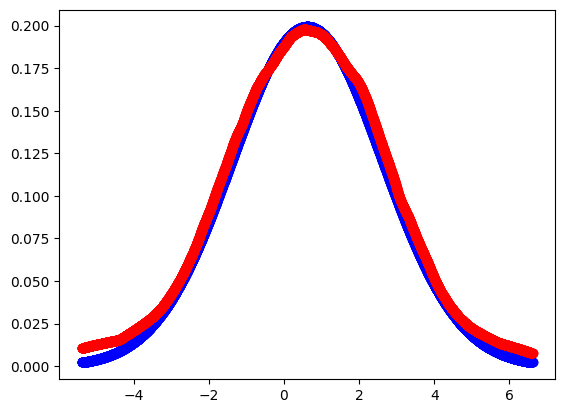

In [46]:
# Plot test data and predictions
ann.eval()

train_input = torch.tensor(train_df["Series1"].values).unsqueeze(1).float().to(device)
train_labels = torch.tensor(train_df["Label"].values).to(device)

train_predictions = ann(train_input).squeeze().detach().cpu().numpy()

plt.scatter(train_df["Series1"], train_df["Label"], color='blue', alpha=0.7, label='Train Data')

plt.scatter(train_df["Series1"], train_predictions, color='red', alpha=0.7, label='Predictions')